In [7]:
import pandas as pd

from data.ehovy_race import EhovyRaceDataset
from data.prompt_dataset import PromptedEhvoy, prompt_with_question, extract_answer

In [4]:
MAX_ARTICLE_CHAR_LENGTH = 800
data = EhovyRaceDataset(variation="high", split="train", max_article_size=MAX_ARTICLE_CHAR_LENGTH)
len(data)

803

In [5]:
data[0]

{'example_id': 'high2778.txt',
 'article': 'The air hostess   was in a small kitchen at the back of the plane, preparing the plates for lunch, when a little old lady came and spoke to her, "Could you please tell me," she asked, "where is the ladies\' lavatory   in the plane?"\n"Yes, madam," said the air hostess and smiled. "It is right at the other end of the plane---at the front."\nThe little lady went too far. She walked all the way to the front of the plane, opened the door in front of her, and saw the captain of the plane and the other officers. They were all busy with their work and did not see her. She went out again, shut the door and returned to the air hostess.\n"Oh, didn\'t you find it, madam?" the girl asked her. "Yes, I did," said the little lady. "But there are four men in the ladies\' lavatory watching television."',
 'answer': 'C',
 'question': 'The story happened  _  .',
 'options': ['in the evening',
  'in the afternoon',
  'in the morning',
  'at midnight']}

In [8]:
prompted_dataset = PromptedEhvoy(data)
prompted_dataset[0]

('Context: The air hostess   was in a small kitchen at the back of the plane, preparing the plates for lunch, when a little old lady came and spoke to her, "Could you please tell me," she asked, "where is the ladies\' lavatory   in the plane?"\n"Yes, madam," said the air hostess and smiled. "It is right at the other end of the plane---at the front."\nThe little lady went too far. She walked all the way to the front of the plane, opened the door in front of her, and saw the captain of the plane and the other officers. They were all busy with their work and did not see her. She went out again, shut the door and returned to the air hostess.\n"Oh, didn\'t you find it, madam?" the girl asked her. "Yes, I did," said the little lady. "But there are four men in the ladies\' lavatory watching television."\n\nQuestions: The story happened  _  .\n\nOptions:\nA) in the evening\nB) in the afternoon\nC) in the morning\nD) at midnight\n\nAnswer:',
 'C')

In [9]:
data_frame = pd.DataFrame(columns=["x", "y"])
for i in range(len(prompted_dataset)):
    x, y = prompted_dataset[i]
    data_frame.loc[i] = [x, y]

In [11]:
data_frame["y"].value_counts()

y
D    228
C    213
B    208
A    154
Name: count, dtype: int64

In [12]:
# add length of x as a column
data_frame["x_length"] = data_frame["x"].apply(lambda x: len(x))

In [13]:
# show max and min length of x
data_frame["x_length"].max(), data_frame["x_length"].min()

(np.int64(1919), np.int64(185))

In [14]:
# show the text with max length
data_frame.loc[data_frame["x_length"].idxmax()]["x"]

"Context: The people below are needed to take part in a sport. After the description of these people, there is information about four sports(A-D). Decide which sport would be most suitable for the person mentioned in questions 58-61 and then mark the correct letter(A-D) on your answer sheet.\n\nQuestions: Jack is brave and risky and a good swimmer. He enjoys water game. He looks for excitement with his friend when they are on holiday.\n\nOptions:\nA) Hiking is a great way to travel. You will get close to nature and take exercise at the same time. Hiking is easy to do and doesn't have to be very expensive. You can hike close to home or travel to other places. The basic equipment you need for hiking is simple: good shoes, clothes and a backpack. You can hike in the mountains, in a forest or along a river. You can also go for a hike in the city. Hiking is fun and exciting, but you shouldn't forget safety.\nB) Rafting is a good way to experience nature. If you want a normal rafting trip, c

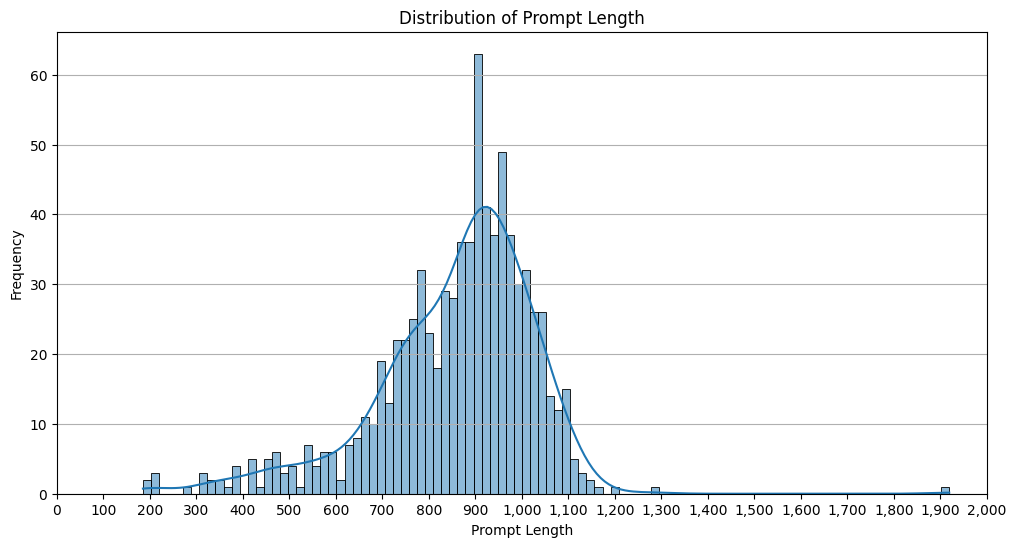

In [15]:
# grap x length distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
sns.histplot(data_frame["x_length"], bins=100, kde=True)
plt.title("Distribution of Prompt Length")
plt.xlabel("Prompt Length")
plt.ylabel("Frequency")
plt.xlim(0, 2000)
plt.xticks(np.arange(0, 2001, 100))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.grid(axis='y')
plt.show()

In [16]:
# lets see what happens if i tokenize the longest prompt
from model.llama_3_2_tokenizer import Llama32Tokenizer

model_1B = "meta-llama/Llama-3.2-1B"
tokenizer = Llama32Tokenizer(model_1B)

longest_prompt = data_frame.loc[data_frame["x_length"].idxmax()]["x"]

In [17]:
tokenized_prompt = tokenizer(longest_prompt)

In [18]:
len(tokenized_prompt["input_ids"][0]), len(tokenized_prompt["attention_mask"][0])

(433, 433)